1. Imports
2. Get data , visualize(optional)
3. Convert to tensors and split into train test
4. Build the model
5. Train the model
6. Get final predictions, visualize(optional)

In [14]:
#normal imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import sklearn

<Axes: >

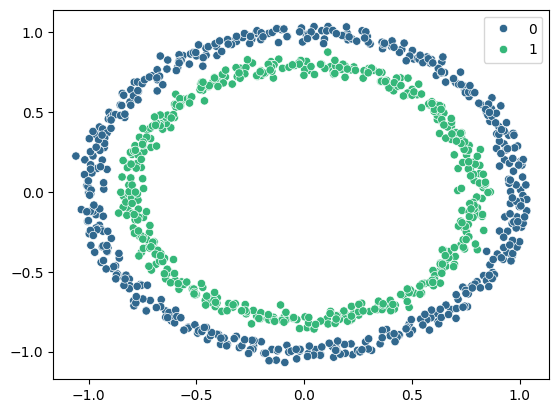

In [15]:
#import data and split into x and y
#this function autmatically creates two concentric circles
from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

# Create a scatter plot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis')

In [16]:
X_tensor = torch.from_numpy(X).type(torch.float)
y_tensor = torch.from_numpy(y).type(torch.float)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tensor,y_tensor,train_size=0.8)

In [17]:
#build the model
from torch import nn

model = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.ReLU(),
    nn.Linear(in_features=5,out_features=25),
    nn.ReLU(),
    nn.Linear(in_features=25,out_features=1)
)

In [23]:
#Build training loop
def trainingLoop(epochs,model,loss_fn,optimizer,accuracy_calculator):
  for epoch in range(epochs):

    #Set model to train
    model.train()

    #1.Do forward pass (Get raw logits --> Convert to probabilities --> Convert to y label)
    y_train_logits = model(X_train).squeeze()
    y_train_probabilities = torch.sigmoid(y_train_logits).squeeze()
    y_train_preds = torch.round(y_train_probabilities).squeeze()

    #2.Calculate the loss (and accuracy)

    #Loss
    loss = loss_fn(y_train_logits,y_train)

    #Accuracy (need to convert to numpy array first)
    y_train_preds_numpy = y_train_preds.detach().numpy()
    accuracy = accuracy_calculator(y_train,y_train_preds_numpy)

    #3.Set optimizer zero grad
    optimizer.zero_grad()

    #4.Backward loss
    loss.backward()

    #5.Optimizer step
    optimizer.step()

    #Set tracker for train and test
    model.eval()
    with torch.inference_mode():
      y_test_logits = model(X_test).squeeze()
      y_test_probabilities = torch.sigmoid(y_test_logits).squeeze()
      y_test_preds = torch.round(y_test_probabilities).squeeze()

      y_test_preds_numpy = y_test_preds.detach().numpy()

      test_loss = loss_fn(y_test_logits,y_test)
      test_accuracy = accuracy_calculator(y_test,y_test_preds_numpy)

      if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%")

      if epoch == epochs-1:
        from sklearn.metrics import confusion_matrix
        conf_matrix = confusion_matrix(y_test, y_test_preds_numpy)

        print("Confusion Matrix:")
        print(conf_matrix)


In [24]:
#Calling the training loop

loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.2)
from sklearn.metrics import accuracy_score

trainingLoop(1000,model,loss_func,optimizer,accuracy_score)

Epoch: 0 | Loss: 0.00334, Accuracy: 1.00% | Test loss: 0.00339, Test acc: 1.00%
Confusion Matrix:
[[ 98   0]
 [  0 102]]
